In [290]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from pathlib import Path
from math import pi
from scipy.signal.windows import blackman # window function
from scipy.signal.windows import barthann
from scipy.signal.windows import chebwin
from scipy.fftpack import fft, fftfreq
matplotlib.rcParams['figure.figsize'] = (10, 10)

import seaborn as sns
sns.set(font_scale=1.5, rc={'text.usetex' : True})

sns.set_style("whitegrid")
sea_color = sns.dark_palette("skyblue", 8, reverse=True)
sns.axes_style({'font.family': ['sans-serif'],
                'font.sans-serif': ['Arial']
                })
# sns.set_theme(style="ticks")

theta_sym ='\u03B8'
delta_sym = '\u0394'
Sigma_sym = '\u03A3'
omega_sym = '\u03C9'

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def plot(list_x, list_y, labels, name, xlabel, ylabel):
    plt.figure(figsize=(10,10))
    for i in range(len(list_x)):
        plt.plot(list_x[i], list_y[i], label=labels[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [283]:
# tab = pd.read_csv('permiability_Tcyl=300_Tin=400_maxl=9_rdx=1.5_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0.txt', sep=", ")
# tab.drop_duplicates( keep='first', inplace=True)
# tab[0:20]

In [284]:
# # Create a visualization
# # plt.figure(figsize=(15,8))
# df = tab[tab['t'] >2.9878]

# # sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20, 'figure.figsize':(25,25)}) 
# sns.set(rc={'figure.figsize':(10,10),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white")
# sns.set_style("whitegrid")
# g = sns.relplot(
#     data=df,
#     x="t", y="permeability2", kind="line"
# )
# # g.set_xlabel("$t$",fontsize=20)
# g.set_axis_labels("$t$","$K_r$")
# plt.show(g)
      
# g = sns.relplot(
#     data=df,
#     x="t", y="porosity", kind="line"
# )
# g.set_axis_labels("$t$",r'$V_{pore}$')
# plt.show(g)

# g = sns.relplot(
#     data=df,
#     x="porosity", y="permeability2", kind="line"
# )
# g.set_axis_labels(r'$V_{pore}$',r'$K_r$')
# plt.show(g)

In [291]:
import glob
files=glob.glob('perm*.txt')
import re


In [293]:
# permiability_Tcyl=300_Tin=400_maxl=10_rdx=2.5_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0_order=1_nonsat=0.txt
df = []
Tin_arr, rdx_arr = [], []
for file in files:
    print(file)
    ll = re.findall(r"[-+]?\d*\.\d+|\d+", file)
    ll = [float(s) for s in ll]
    try:
        tab = pd.read_csv(file, sep=", ")
        tab.drop_duplicates( keep='first', inplace=True)
        Tin_arr.append(ll[1]) 
        rdx_arr.append(ll[3])
        dict_tab = {"Tcyl":ll[0], "Tin":ll[1], "maxl":ll[2],
                    "rdx":ll[3], "rdy":ll[4], "rfx":ll[5],
                    "Ncx":ll[6], "Ncy":ll[7],
                    "dr":ll[8], "dx":ll[9], "dy":ll[10], "df":tab}
        try:
            dict_tab["order"] = ll[11]
        except:
            pass
        try:
            dict_tab["nonsat"] = ll[12]
        except:
            pass
        df.append(dict_tab)
    except:
        print(file, 'FILE is empty!')

permiability_Tcyl=300_Tin=450_maxl=10_rdx=1.1_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0_order=1_nonsat=0.txt
permiability_Tcyl=300_Tin=320_maxl=10_rdx=1.1_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0.txt
permiability_Tcyl=300_Tin=320_maxl=10_rdx=1.1_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0.txt FILE is empty!
permiability_Tcyl=300_Tin=320_maxl=9_rdx=1.5_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0.txt


/Users/weugene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



permiability_Tcyl=300_Tin=350_maxl=10_rdx=1.5_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0_order=1_nonsat=0.txt
permiability_Tcyl=300_Tin=370_maxl=9_rdx=1.1_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0.txt
permiability_Tcyl=300_Tin=300_maxl=10_rdx=2.5_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0_order=1_nonsat=0.txt
permiability_Tcyl=300_Tin=370_maxl=9_rdx=3_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0.txt
permiability_Tcyl=300_Tin=450_maxl=10_rdx=2_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0_order=1_nonsat=0.txt
permiability_Tcyl=300_Tin=400_maxl=9_rdx=2.5_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0.txt
permiability_Tcyl=300_Tin=300_maxl=9_rdx=2_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0.txt
permiability_Tcyl=300_Tin=300_maxl=9_rdx=1.5_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0.txt
permiability_Tcyl=300_Tin=350_maxl=9_rdx=1.1_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0.txt
permiability_Tcyl=300_Tin=450_maxl=10_rdx=1.2_rdy=2_rfx=-6_Ncx=5_Ncy=8_dr=0_dx=0_dy=0_order=1_nonsat=0.txt
permiability_Tcyl=300_Tin=300_maxl=10_rdx=1.

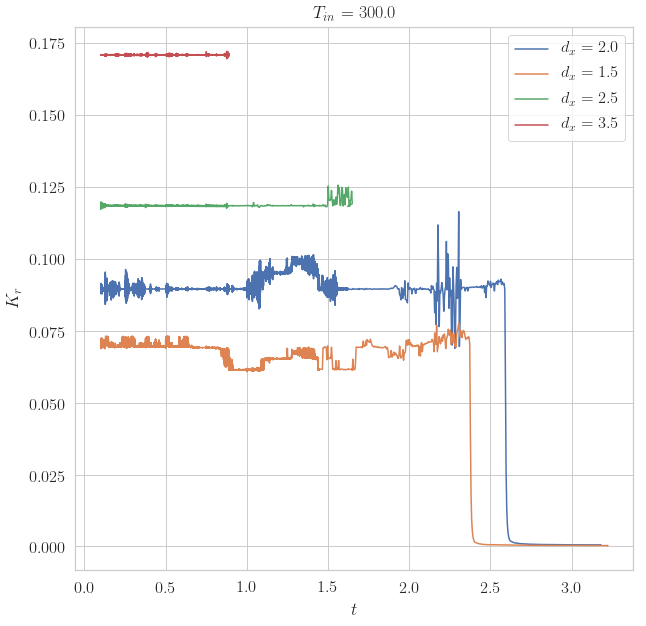

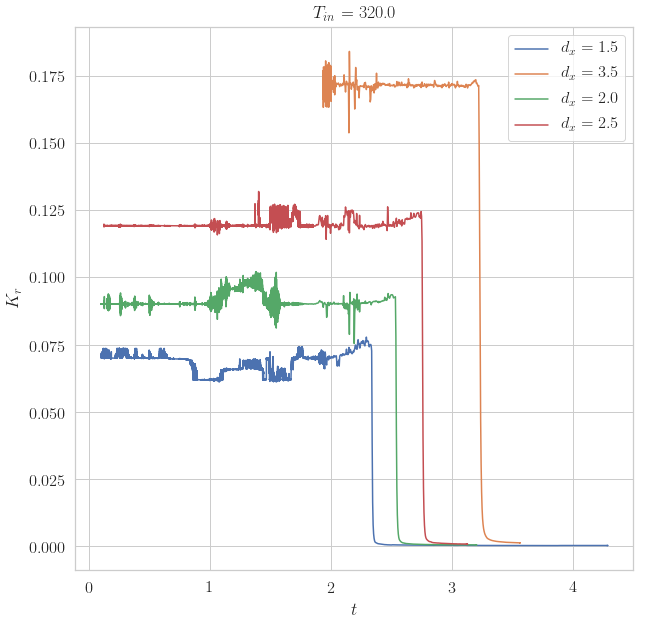

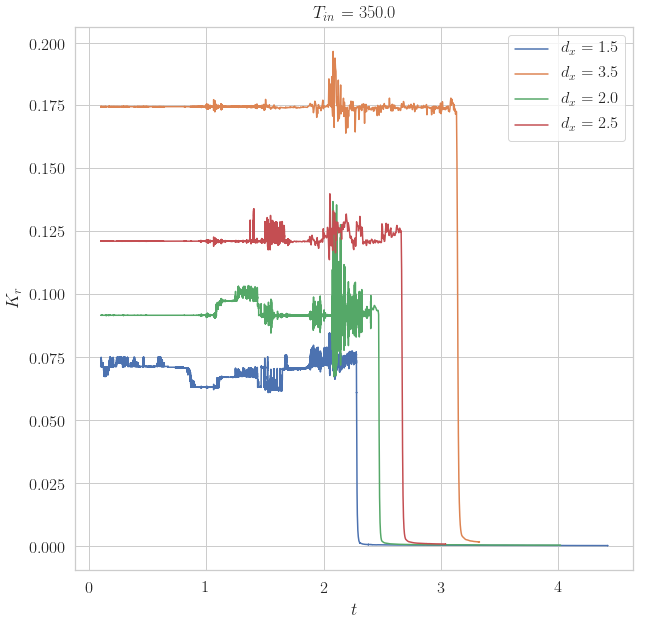

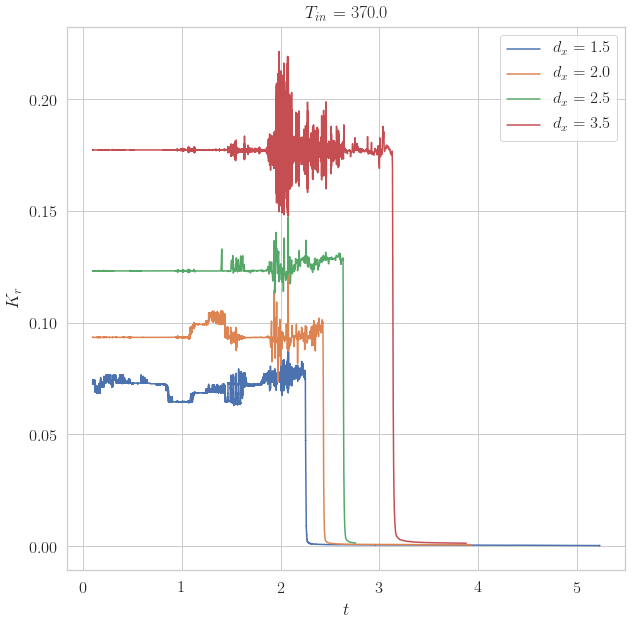

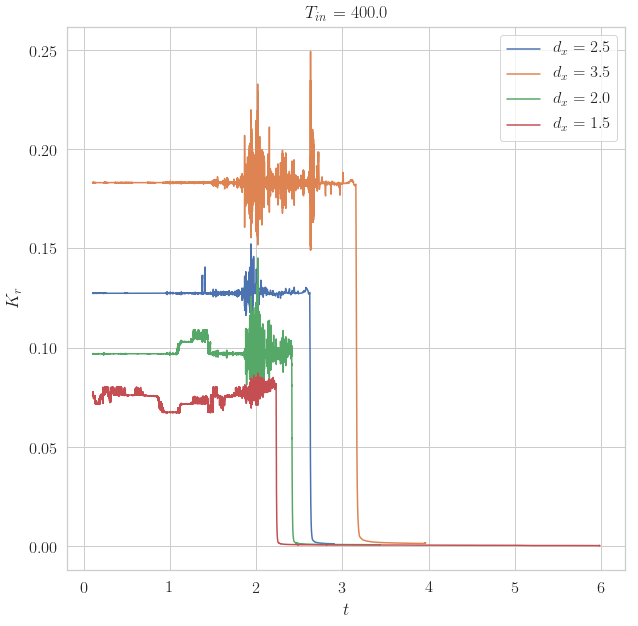

In [302]:
# plt.figure(figsize=(15,15))
Tin_arr_select = [300, 320, 350, 370, 400]
rdx_arr_select = [1.5, 2, 2.5, 4, 3.5]
for tin in Tin_arr_select:
    for dict_tab in df:

        Tcyl = dict_tab["Tcyl"]
        Tin = dict_tab["Tin"]
        maxl = dict_tab["maxl"]
        rdx = dict_tab["rdx"]
        rdy = dict_tab["rdy"]
        rfx = dict_tab["rfx"]
        Ncx = dict_tab["Ncx"]
        Ncy = dict_tab["Ncy"]
        dr = dict_tab["dr"]
        dx = dict_tab["dx"]
        dy = dict_tab["dy"]
        tab = dict_tab["df"]
        tab = tab[tab['t'] > 0.1]

        if abs(tin - Tin) < 1e-3 and rdx in rdx_arr_select:
            try:
                alpha = 0.1
                mean = alpha*tab['permeability2'].min() + (1 - alpha)*tab['permeability2'].max()
                tmax = tab[tab['permeability2'] < mean]['t'].values[0]
                kr = tab['permeability2']
                tt = tab['t']

                dff = tab[tab['t'] > tmax]
                name = r'$T_{in}$ = {}' + str(Tin)

                plt.plot(dff['t'], dff['permeability2'], label = r'$d_x={}$'.format(rdx))
                plt.xlabel(r'$t$')
                plt.ylabel(r'$K_r$')
                plt.title(name)
                plt.legend()
            except:
                pass
    plt.show()

# plot([dff['t'], dff['t']], [dff['phi_resin'], dff['phi_gas']], ['resin', 'gas'], name, r'$t$', r'$V$')

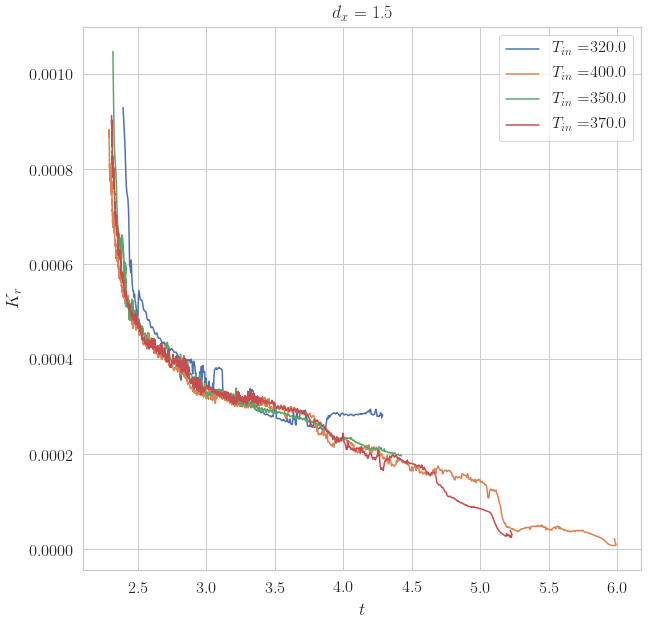

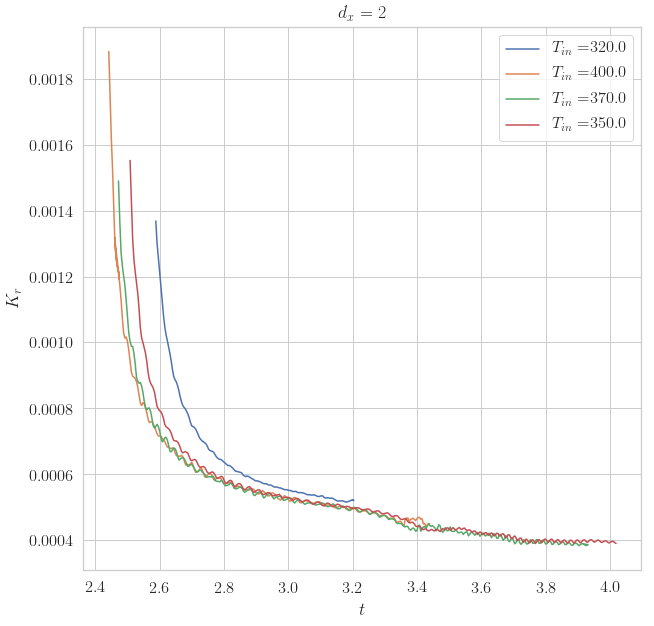

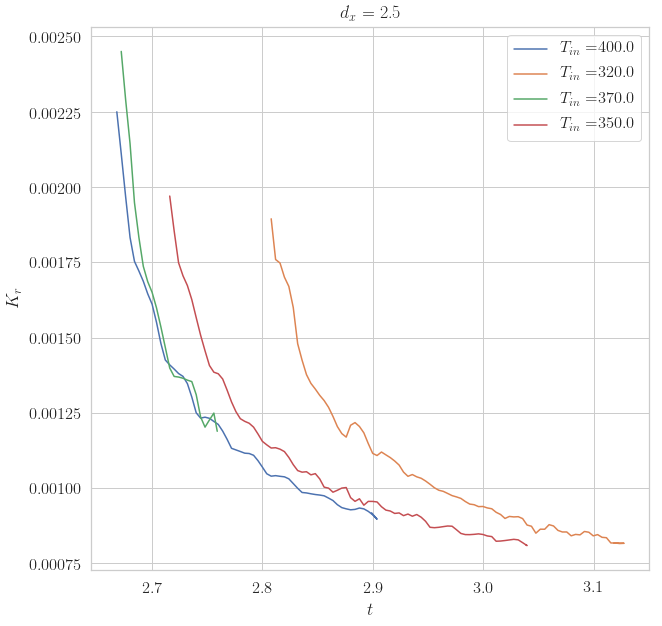

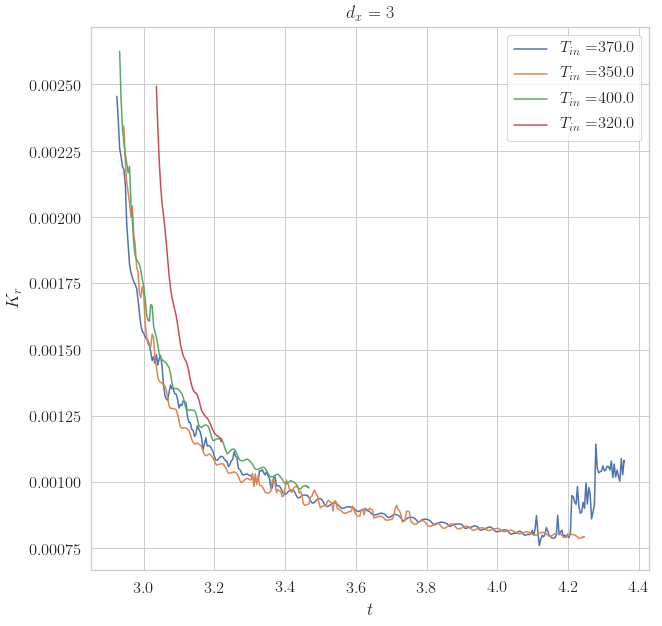

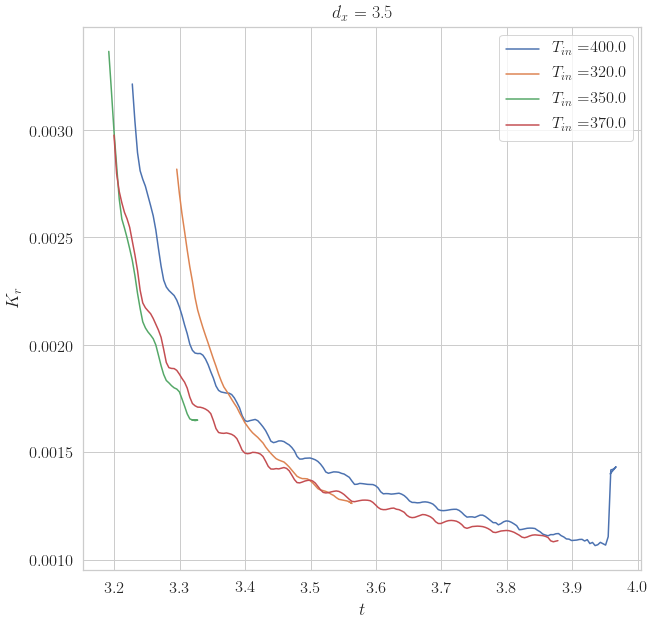

In [305]:
Tin_arr_select = [320, 350, 370, 400]
rdx_arr_select = [1.5, 2, 2.5, 3, 3.5, 4]
Temp_color_arr = {300:'navy', 320: 'blue', 350:'green', 370:'orange', 400:'red'}
Rdx_style_arr = {1.5:'solid', 2:'densely dotted', 2.5:'dotted', 3:'dashdot', 3.5:'dashed', 4:'loosely dashed'}

for rdx_sel in rdx_arr_select:
    for dict_tab in df:

        Tcyl = dict_tab["Tcyl"]
        Tin = dict_tab["Tin"]
        maxl = dict_tab["maxl"]
        rdx = dict_tab["rdx"]
        rdy = dict_tab["rdy"]
        rfx = dict_tab["rfx"]
        Ncx = dict_tab["Ncx"]
        Ncy = dict_tab["Ncy"]
        dr = dict_tab["dr"]
        dx = dict_tab["dx"]
        dy = dict_tab["dy"]
        tab = dict_tab["df"]
        tab = tab[tab['t'] > 0.1]

        if abs(rdx_sel - rdx) < 1e-3 and Tin in Tin_arr_select:
            try:
                alpha = 0.99
                mean = alpha*tab['permeability2'].min() + (1 - alpha)*tab['permeability2'].max()
                tmax = tab[tab['permeability2'] < mean]['t'].values[0]
                kr = tab['permeability2']
                tt = tab['t']

                dff = tab[tab['t'] > tmax]
                name = r'$d_{x}$ = {}' + str(rdx_sel)

                plt.plot(dff['t'], dff['permeability2'], label = r'$T_{in}=$'+ str(Tin))
                plt.xlabel(r'$t$')
                plt.ylabel(r'$K_r$')
                plt.title(name)
                plt.legend()
            except:
                pass
    plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

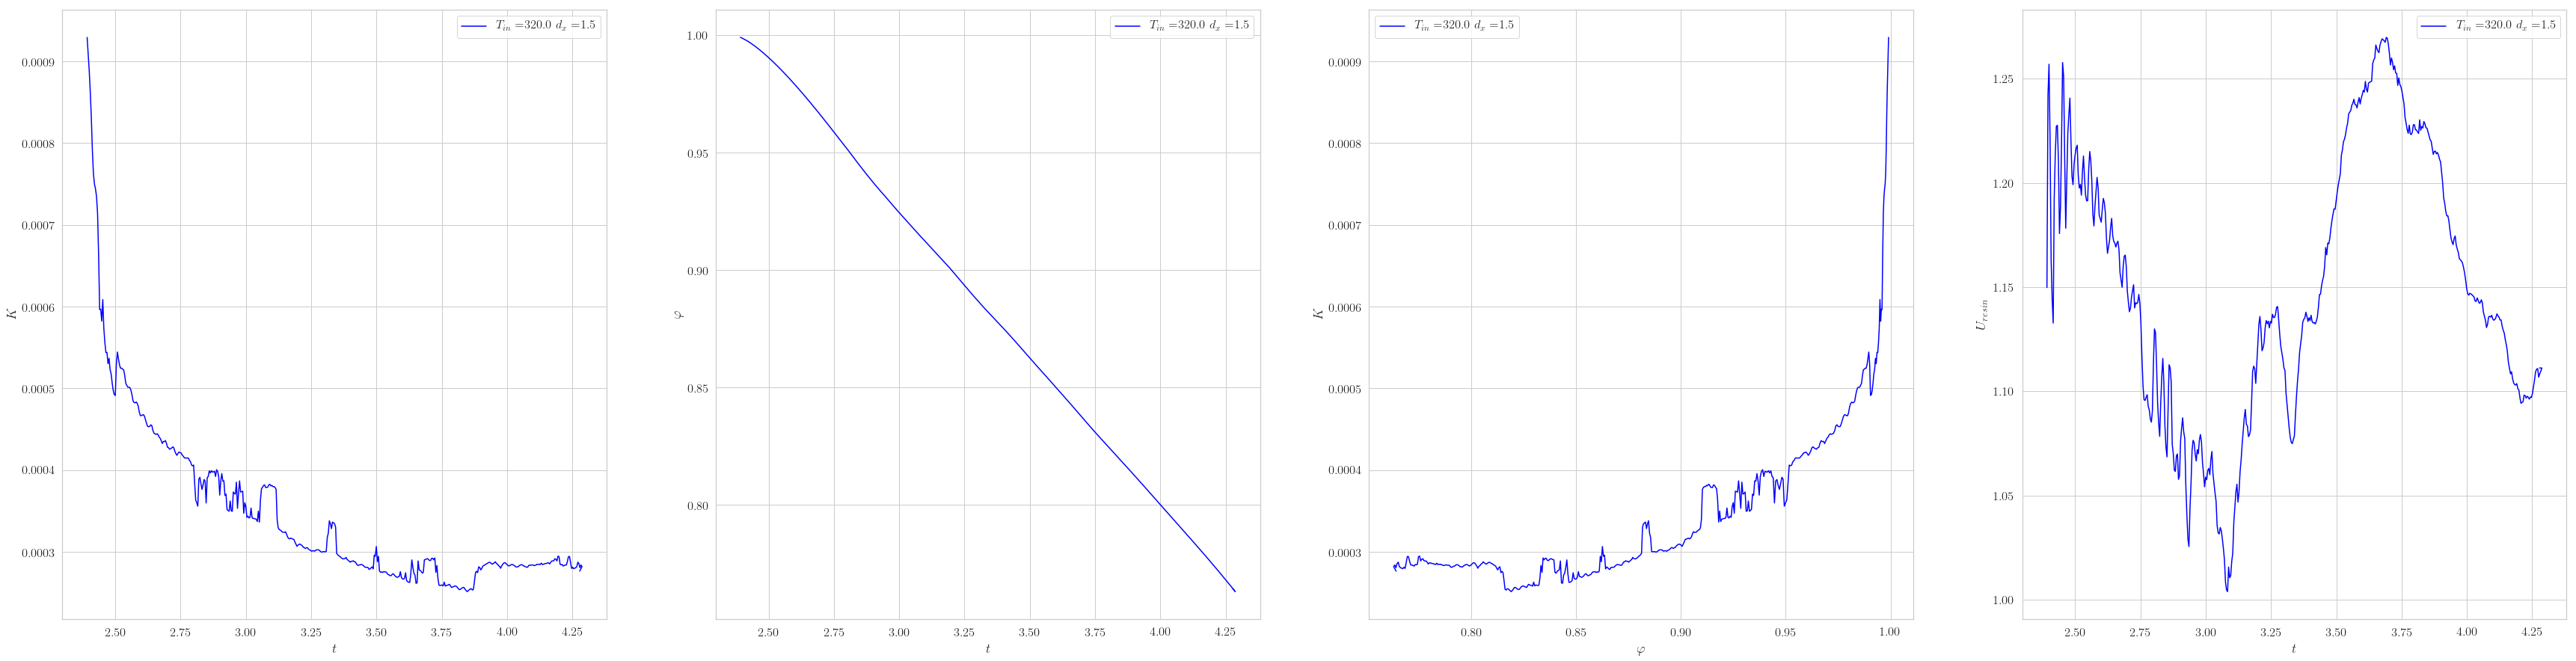

In [294]:
Tin_arr_select = [320, 350, 370, 400]
rdx_arr_select = [1.5, 2, 2.5, 3, 3.5, 4]
Temp_color_arr = {300:'navy', 320: 'blue', 350:'green', 370:'orange', 400:'red'}
Rdx_style_arr = {1.5:'solid', 2:(0, (1, 1)), 2.5:'dotted', 3:'dashdot', 3.5:'dashed', 4:(0, (5, 10))}

fsize = 15
fnum = 4
fig, ax = plt.subplots(1, fnum, figsize=(4*fsize,fsize))
for dict_tab in df:
    Tcyl = dict_tab["Tcyl"]
    Tin = dict_tab["Tin"]
    maxl = dict_tab["maxl"]
    rdx = dict_tab["rdx"]
    rdy = dict_tab["rdy"]
    rfx = dict_tab["rfx"]
    Ncx = dict_tab["Ncx"]
    Ncy = dict_tab["Ncy"]
    dr = dict_tab["dr"]
    dx = dict_tab["dx"]
    dy = dict_tab["dy"]
    tab = dict_tab["df"]
    tab = tab[tab['t'] > 0.1]

    if Tin in Tin_arr_select and rdx in rdx_arr_select:
        alpha = 0.99
        mean = alpha*tab['permeability2'].min() + (1 - alpha)*tab['permeability2'].max()
        tmax = tab[tab['permeability2'] < mean]['t'].values[0]
        kr = tab['permeability2']
        tt = tab['t']

        dff = tab[tab['t'] > tmax]
        name = r'$d_{x}$ = {}' + str(rdx_sel)
        
        ax[0].plot(dff['t'], dff['permeability2'], label = r'$T_{in}=$'+ str(Tin) + r' $d_x=$' + str(rdx), color=Temp_color_arr[Tin], linestyle=Rdx_style_arr[rdx])
        ax[0].set_xlabel(r'$t$')
        ax[0].set_ylabel(r'$K$')
        ax[0].legend()
        
        ax[1].plot(dff['t'], dff['porosity'], label = r'$T_{in}=$'+ str(Tin) + r' $d_x=$' + str(rdx), color=Temp_color_arr[Tin], linestyle=Rdx_style_arr[rdx])
        ax[1].set_xlabel(r'$t$')
        ax[1].set_ylabel(r'$\varphi$')
        ax[1].legend()
        
        ax[2].plot(dff['porosity'], dff['permeability2'], label = r'$T_{in}=$'+ str(Tin) + r' $d_x=$' + str(rdx), color=Temp_color_arr[Tin], linestyle=Rdx_style_arr[rdx])
        ax[2].set_xlabel(r'$\varphi$')
        ax[2].set_ylabel(r'$K$')
        ax[2].legend()
        
        ax[3].plot(dff['t'], dff['vel_in_resin_x'], label = r'$T_{in}=$'+ str(Tin) + r' $d_x=$' + str(rdx), color=Temp_color_arr[Tin], linestyle=Rdx_style_arr[rdx])
        ax[3].set_xlabel(r'$t$')
        ax[3].set_ylabel(r'$U_{resin}$')
        ax[3].legend()
        
fig.savefig('myplot.eps')
fig.show()

In [ ]:

dict_tab = df[0]
Tcyl = dict_tab["Tcyl"]
Tin = dict_tab["Tin"]
maxl = dict_tab["maxl"]
rdx = dict_tab["rdx"]
rdy = dict_tab["rdy"]
rfx = dict_tab["rfx"]
Ncx = dict_tab["Ncx"]
Ncy = dict_tab["Ncy"]
dr = dict_tab["dr"]
dx = dict_tab["dx"]
dy = dict_tab["dy"]
tab = dict_tab["df"]
tab = tab[tab['t'] > 0.1]
tab.rename(columns={"sqrt(sq(vel_in_all_region_x) + sq(vel_in_all_region_y))": "mag_vel_all", 
                    "sqrt(sq(vel_in_resin_x) + sq(vel_in_resin_y))": "mag_vel_resin",
                    'sqrt(sq(vel_in_resin_solid_x) + sq(vel_in_resin_solid_y))': "mag_vel_resin_sol",
                    'sqrt(sq(vel_in_resin_gas_x) + sq(vel_in_resin_gas_y))': "mag_vel_resin_gas"
          }, inplace=True)

tab['phi_resin'] = tab['volume_of_resin_out_of_solid']/tab['volume_of_fluids']
tab['phi_gas'] = tab['volume_of_gas_out_of_solid']/tab['volume_of_fluids']



try:
#     mean = 0.5*(tab['permeability2'].min() + tab['permeability2'].max())
    mean = 1e+9
    tmax = tab[tab['permeability2'] < mean]['t'].values[0]
    kr = tab['permeability2']
    tt = tab['t']

    print(mean, tmax)

    dff = tab[tab['t'] > tmax]
    
    name = r'$T_{in}=$' + str(Tin) + ', $d_x=$' + str(rdx)
    plot([dff['t'], dff['t']], [dff['permeability1'], dff['permeability2']], ['$K_{r,1}$', '$K_{r,2}$'], name, r'$t$', r'$K_r$')
    

    name = r'$T_{in}=$' + str(Tin) + ', $rdx=$' + str(rdx)
    plot([dff['t'], dff['t']], [dff['phi_resin'], dff['phi_gas']], ['resin', 'gas'], name, r'$t$', r'$V$')
    plot([dff['t']], [dff['xmax_tip']], [r'$x_{max}$'], name, r'$t$', r'$x_{max}$')
    plot([dff['t']], [dff['phi_gas']], [r'$\varphi_{gas}$'], name, r'$t$', r'$\varphi_{gas}$')
    
    dfff=dff#[dff['phi_gas'] < 0.98]
    plot([dfff['phi_gas']], [dfff['permeability2']], ['$K_{r,1}$'], name, r'$\varphi$', r'$K_r$')
    plot([dfff['t']], [dfff['mag_vel_all']], ['$|v_{mean}|$'], name, r'$t$', r'$|v_{mean}|$')
    plot([dfff['t']], [dfff['mag_vel_resin']], ['$|v_{resin}|$'], name, r'$t$', r'$|v_{resin}|$')
except:
    pass

In [267]:
tab[-150:-100].head()

,i,t,gradp,x_left,p_int[imin],x_right,p_int[imax],permeability1,permeability2,xmax_tip,xmax_prev,volume_all,volume_of_fluids,volume_of_resin,volume_of_resin_out_of_solid,volume_of_gas,volume_of_gas_out_of_solid,volume_of_solid,porosity,porositys,vel_in_all_region_x,vel_in_all_region_y,sqrt(sq(vel_in_all_region_x) + sq(vel_in_all_region_y)),vel_in_resin_x,vel_in_resin_y,sqrt(sq(vel_in_resin_x) + sq(vel_in_resin_y)),vel_in_resin_solid_x,vel_in_resin_solid_y,sqrt(sq(vel_in_resin_solid_x) + sq(vel_in_resin_solid_y)),vel_in_resin_gas_x,vel_in_resin_gas_y,sqrt(sq(vel_in_resin_gas_x) + sq(vel_in_resin_gas_y)),ulocal.x,ulocal.y,mynorm(ulocal),utip.x,utip.y,T_in_resin_avg,T_in_fluid_avg,T_in_all_region_avg,alpha_doc_avg,mu_avg,gradpx_in_resin_without_solid,gradpx_in_air_without_solid,vol_max
365505,65800,2.62807,0.0,-2.5,0.0,6.5,0,0,0.147320,0,0,144,125.165,1.600000e-09,1.600000e-09,144.0,125.165,18.8349,1.0,1.0,1.00006,0.000613,1.00006,0.0,0.0,0.0,0.0,0.0,0.0,1.15055,0.000705,1.15055,0,0,0,0,0,0.0,0.944674,0.944406,0.0,0.0,0.0,-0.740282,NaN
365513,65900,2.63207,0.0,-2.5,0.0,6.5,0,0,0.147519,0,0,144,125.165,1.600000e-09,1.600000e-09,144.0,125.165,18.8349,1.0,1.0,1.00005,0.000992,1.00005,0.0,0.0,0.0,0.0,0.0,0.0,1.15053,0.001142,1.15053,0,0,0,0,0,0.0,0.944687,0.944419,0.0,0.0,0.0,-0.739297,NaN
365521,66000,2.63606,0.0,-2.5,0.0,6.5,0,0,0.147704,0,0,144,125.165,1.600000e-09,1.600000e-09,144.0,125.165,18.8349,1.0,1.0,1.00010,-0.001239,1.00010,0.0,0.0,0.0,0.0,0.0,0.0,1.15060,-0.001426,1.15060,0,0,0,0,0,0.0,0.944701,0.944432,0.0,0.0,0.0,-0.738369,NaN
365529,66100,2.64006,0.0,-2.5,0.0,6.5,0,0,0.147563,0,0,144,125.165,1.600000e-09,1.600000e-09,144.0,125.165,18.8349,1.0,1.0,1.00004,-0.002315,1.00004,0.0,0.0,0.0,0.0,0.0,0.0,1.15052,-0.002664,1.15053,0,0,0,0,0,0.0,0.944714,0.944445,0.0,0.0,0.0,-0.739071,NaN
365537,66200,2.64406,0.0,-2.5,0.0,6.5,0,0,0.147462,0,0,144,125.165,1.600000e-09,1.600000e-09,144.0,125.165,18.8349,1.0,1.0,1.00008,-0.001935,1.00008,0.0,0.0,0.0,0.0,0.0,0.0,1.15057,-0.002226,1.15058,0,0,0,0,0,0.0,0.944728,0.944458,0.0,0.0,0.0,-0.73959,NaN


In [ ]:
tab.columns

In [301]:
# df[0]['df']['permeability2']